# Generating Data
Lets say you want to generate synthetic data of the number of new visitors to an Emergency Department over time.  
based on the mean number of visitors
for that we would need to 
- Create the date range
- Create the random data based on the poisson distribution

In [2]:
import pandas as pd
import numpy as np

### The date range
use the `date_range()` function see [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)


be aware of american formatting

In [3]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

I would strongly suggest that you use the formatt year first.

In [4]:
pd.date_range(start='2023-01-01', end='2023-01-04')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'], dtype='datetime64[ns]', freq='D')

You can use freq to say that we want hourly data

In [5]:
pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")

C:\Users\curleys\AppData\Local\Temp\ipykernel_13456\26285310.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               '2023-01-01 10:00:00', '2023-01-01 11:00:00',
               '2023-01-01 12:00:00', '2023-01-01 13:00:00',
               '2023-01-01 14:00:00', '2023-01-01 15:00:00',
               '2023-01-01 16:00:00', '2023-01-01 17:00:00',
               '2023-01-01 18:00:00', '2023-01-01 19:00:00',
               '2023-01-01 20:00:00', '2023-01-01 21:00:00',
               '2023-01-01 22:00:00', '2023-01-01 23:00:00',
               '2023-01-02 00:00:00', '2023-01-02 01:00:00',
               '2023-01-02 02:00:00', '2023-01-02 03:00:00',
               '2023-01-02 04:00:00', '2023-01-02 05:00:00',
               '2023-01-02 06:00:00', '2023-01-02 07:00:00',
               '2023-01-

Lets store this in a variable that I will make the index of my Data Frame

In [6]:
idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")

C:\Users\curleys\AppData\Local\Temp\ipykernel_13456\1685073540.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range(start='2023-01-01', end='2023-01-04', freq="H")


ok lets generate some ramdom data (the same lenght of the idx)


In [7]:
rng = np.random.default_rng()

In [8]:
df = pd.DataFrame(index = idx, data = rng.random(len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,0.527177
2023-01-01 01:00:00,0.924641
2023-01-01 02:00:00,0.604510


Ok that does not look like proper data. (hard to treat .3 of a person :) )  
so we need a discrete set of random numbers that match a mean....... so we use the *poisson distribution*  

see [docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html)  
also more information https://en.wikipedia.org/wiki/Poisson_distribution


In [9]:
mean_admissions = 15


we will use poisson distribution  
`poisson(lam=the_mean, size= number_to_return)`

In [18]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=mean_admissions, size= len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,17
2023-01-01 01:00:00,13
2023-01-01 02:00:00,20


In [11]:
import seaborn as sns

<Axes: xlabel='None', ylabel='admissions'>

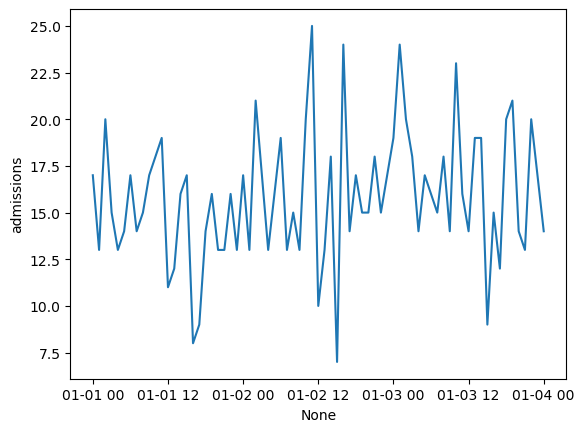

In [19]:
sns.lineplot(data=df,x = df.index, y="admissions")

In [20]:
df["admissions"].mean()

15.835616438356164

#### This does not take into account the time of the day 
we can pass in an array into lam to reflect the changing averages though out the day


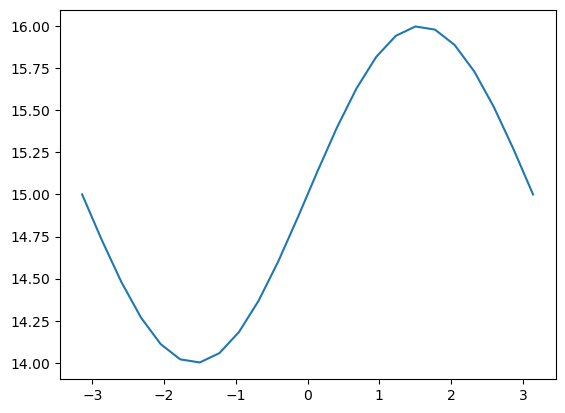

In [ ]:
x = np.linspace(-np.pi, np.pi, 24)          # minus pie to plus pie / 24 hours 
means = np.sin(x) +15                       # mean is a sine wave +15
import matplotlib.pylab as plt
plt.plot(x, means)                      # plot the sine wave. Mean is going to change up and down depending on the time of the day

In [ ]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=means, size= len(idx)), columns=["admissions"])       # array into lamda. This should set the means to change over time
df.head(3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (73,) and arg 1 with shape (24,).

In [25]:
len(idx)            # lam=means is 24 and the length of the index is 73

73

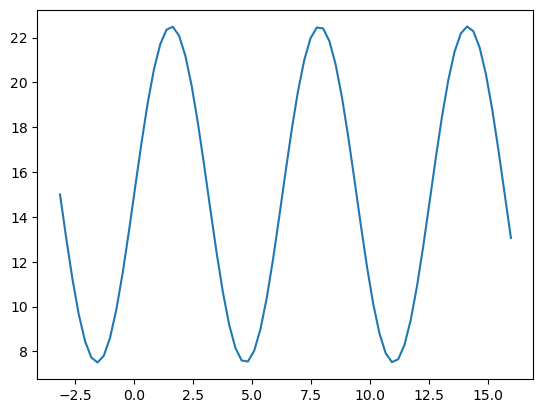

In [26]:
#x = np.linspace(-np.pi, 3*np.pi, len(73))         3 pies will give us 3 days
number_ofdays = len(idx)/24         # length of the index divided by 24
multiplier =( number_ofdays *2) -1
x = x = np.linspace(-np.pi, multiplier*np.pi , len(idx))   # minus pie to the number of days will give 3 waves
admissions_means = (np.sin(x) * (mean_admissions/2)) + mean_admissions  # make sine waves bigger
import matplotlib.pylab as plt
plt.plot(x, admissions_means)


In [27]:
df = pd.DataFrame(index = idx, data = rng.poisson(lam=admissions_means, size= len(idx)), columns=["admissions"])
df.head(3)

,admissions
2023-01-01 00:00:00,13
2023-01-01 01:00:00,15
2023-01-01 02:00:00,10


<Axes: xlabel='None', ylabel='admissions'>

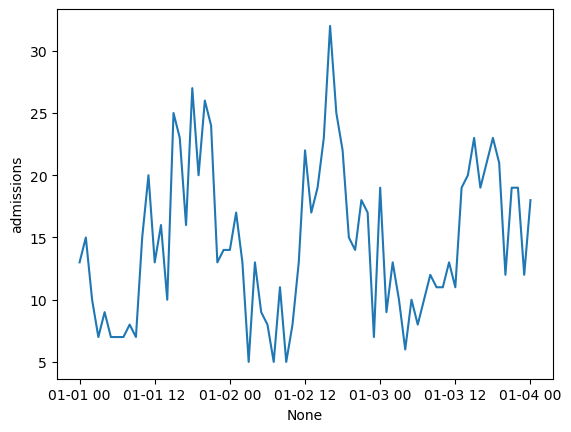

In [28]:
sns.lineplot(data=df,x = df.index, y="admissions")

### References
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
- https://en.wikipedia.org/wiki/Poisson_distribution
- https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html